In [1]:
#attempt to improve the NN
#add the local and the global view construct coz transit false positive mismatch seems to be a major problem
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
X_train=np.loadtxt('training_data/Xtrain_av_raw200_2_3d0.csv',delimiter=',')
Y_train=np.loadtxt('training_data/Ytrain_av_raw200_2_3d0.csv',delimiter=',')

#Xtrain=np.loadtxt('training_data/Xtrain_av_raw500.csv',delimiter=',')
#Ytrain=np.loadtxt('training_data/Ytrain_av_raw500.csv',delimiter=',')
#Xtest=np.loadtxt('training_data/Xtest_av_raw500.csv',delimiter=',')
#Ytest=np.loadtxt('training_data/Ytest_av_raw500.csv',delimiter=',')

#arr=np.arange(0,len(Xtrain),1)
#arr2=np.arange(0,len(Xtest),1)
#np.random.shuffle(arr)
#np.random.shuffle(arr2)
#Xtrain=np.array([Xtrain[z] for z in arr])
#Ytrain=np.array([Ytrain[z] for z in arr])
#Xtest=np.array([Xtest[z] for z in arr2])
#Ytest=np.array([Ytest[z] for z in arr2])

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_train, Y_train, test_size=0.2)
print(Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape)

(1032, 200) (1032, 2) (258, 200) (258, 2)


<function matplotlib.pyplot.show(close=None, block=None)>

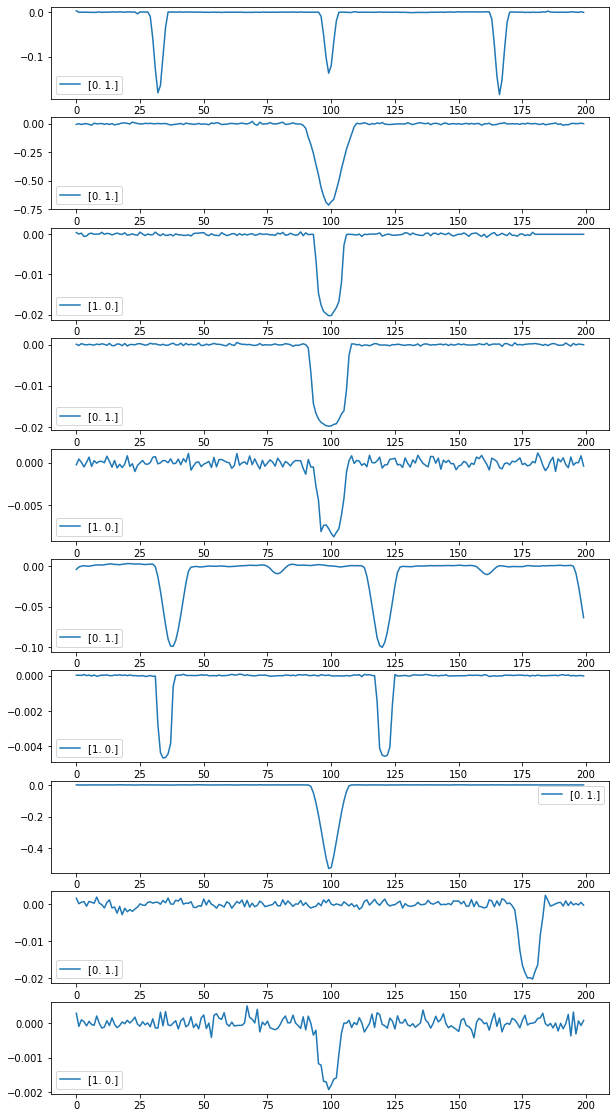

In [3]:
np.random.seed(11223)
#Ytrain = np.asarray([[0,1] if(el[0]<0.001) else [1,0] for el in Ytrain])
#Ytest = np.asarray([[0,1] if(el[0]<0.001) else [1,0] for el in Ytest])
#Ytrain=np.asarray([[1,0] if el[0]==1 else [0,1] for el in Ytrain])
#Ytest=np.asarray([[1,0] if el[0]==1 else [0,1] for el in Ytest])
#print(Ytrain.shape, Ytest.shape)
'''
kernel_size = 3
kernel = np.ones(kernel_size) / kernel_size
Xtrain = [np.convolve(Xtrain[i], kernel, mode='same') for i in range(len(Xtrain))]
Xtest = [np.convolve(Xtest[i], kernel, mode='same') for i in range(len(Xtest))]
'''
vararr=np.random.randint(0,len(Xtrain),size=10)
fig,ax=plt.subplots(10,1,figsize=(10,20))

for i in range(0,10):
    ax[i].plot(Xtrain[vararr[i]],label=Ytrain[vararr[i]])
    ax[i].legend()
plt.show

    

In [6]:

IMG_SIZE=200
conv_ip = keras.layers.Input(shape=(IMG_SIZE,),name='Input')
x=keras.layers.Reshape((IMG_SIZE, 1), input_shape=(IMG_SIZE,),name='reshape_1')(conv_ip)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Conv1D(16,kernel_size=3,strides=1,activation='tanh',padding='same',name='second_conv16_5')(x)
x=keras.layers.Conv1D(16,kernel_size=3,strides=1,activation='tanh',padding='same',name='third_conv16_5')(x) 

x=keras.layers.MaxPool1D(3,strides=2 ,data_format='channels_last',padding='same',name='maxpool_1')(x)  #800
x=keras.layers.Conv1D(32,kernel_size=3,strides=1,activation='tanh',padding='same',name='second_conv32_5')(x)
x=keras.layers.Conv1D(32,kernel_size=3,strides=1,activation='tanh',padding='same',name='third_conv32_5')(x)

x=keras.layers.MaxPool1D(3,strides=2,data_format='channels_last',padding='same',name='maxpool_2')(x)  #400
x=keras.layers.Conv1D(64,kernel_size=3,strides=1,activation='tanh',padding='same',name='second_conv64_5')(x)
x=keras.layers.Conv1D(64,kernel_size=3,strides=1,activation='tanh',padding='same',name='third_conv64_5')(x)

#x=keras.layers.MaxPool1D(3,strides=1,data_format='channels_last',padding='same',name='maxpool_4')(x)  #400
#x=keras.layers.Conv1D(128,kernel_size=3,strides=1,activation='tanh',padding='same',name='second_conv64_6')(x)
#x=keras.layers.Conv1D(128,kernel_size=3,strides=1,activation='tanh',padding='same',name='third_conv64_6')(x)
    
x=keras.layers.MaxPool1D(3,strides=1,data_format='channels_last',padding='same',name='maxpool_3')(x)    #200

x = keras.layers.Flatten(name='flat_1')(x)

x3=keras.layers.Dense(256,name='dense_layer_1',activation='relu')(x)
x3=keras.layers.Dense(256,name='dense_layer_2',activation='relu')(x3)
x3=keras.layers.Dense(256,name='dense_layer_3',activation='relu')(x3)

x3=keras.layers.Dense(1,name='dense_layer_5',activation='relu')(x3)
conv_op=keras.layers.Dense(2,name='dense_layer_6',activation='softmax')(x3)

convNN = keras.Model(inputs=conv_ip, outputs=conv_op,name='Convolutional_NN')

convNN.summary()
convNN.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00005), loss='categorical_crossentropy',metrics=['accuracy'])



Model: "Convolutional_NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 200)]             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 200, 1)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 200, 1)            4         
_________________________________________________________________
second_conv16_5 (Conv1D)     (None, 200, 16)           64        
_________________________________________________________________
third_conv16_5 (Conv1D)      (None, 200, 16)           784       
_________________________________________________________________
maxpool_1 (MaxPooling1D)     (None, 100, 16)           0         
_________________________________________________________________
second_conv32_5 (Conv1D)     (None, 100, 32)      

In [12]:

history=convNN.fit(np.asarray(Xtrain),np.asarray(Ytrain), batch_size=64, epochs=30 , verbose=1 ,shuffle=True, validation_split=0.2)

Epoch 1/30
13/13 [==============================] - 0s 32ms/step - loss: 0.3894 - accuracy: 0.9091 - val_loss: 0.3899 - val_accuracy: 0.9179
Epoch 2/30
13/13 [==============================] - 0s 26ms/step - loss: 0.3991 - accuracy: 0.9103 - val_loss: 0.3869 - val_accuracy: 0.9179
Epoch 3/30
13/13 [==============================] - 0s 26ms/step - loss: 0.3901 - accuracy: 0.9188 - val_loss: 0.4030 - val_accuracy: 0.8937
Epoch 4/30
13/13 [==============================] - 0s 27ms/step - loss: 0.3841 - accuracy: 0.9164 - val_loss: 0.3894 - val_accuracy: 0.9130
Epoch 5/30
13/13 [==============================] - 0s 26ms/step - loss: 0.3836 - accuracy: 0.9224 - val_loss: 0.3965 - val_accuracy: 0.8889
Epoch 6/30
13/13 [==============================] - 0s 26ms/step - loss: 0.3848 - accuracy: 0.9212 - val_loss: 0.3872 - val_accuracy: 0.9179
Epoch 7/30
13/13 [==============================] - 0s 27ms/step - loss: 0.3784 - accuracy: 0.9236 - val_loss: 0.3861 - val_accuracy: 0.9179
Epoch 8/30
13

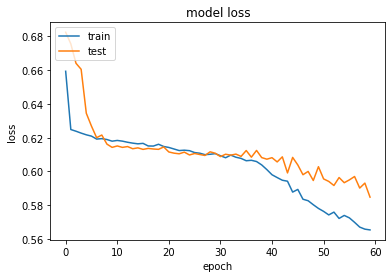

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')  
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('present_LC_cnn.png')
plt.show()

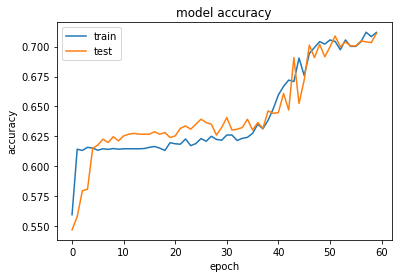

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('present_LC_cnn_acc.png')
plt.show()

In [14]:
convNN.save('present_raw_cnn_200.h5')

In [20]:
convNN.load_weights('need_These.h5')

In [13]:
test_loss, test_acc = convNN.evaluate(np.array(Xtest), np.array(Ytest))
print('Test accuracy:', test_acc)
Ypred_raw=convNN.predict(np.array(Xtest))
Ypred=np.argmax(Ypred_raw, axis=1)
Ytest_new=np.argmax(Ytest,axis=1)
cm = confusion_matrix(Ytest_new, Ypred)
print(cm)

9/9 [==============================] - 0s 20ms/step - loss: 0.3747 - accuracy: 0.9225
Test accuracy: 0.9224806427955627
[[126   2]
 [ 18 112]]


PC


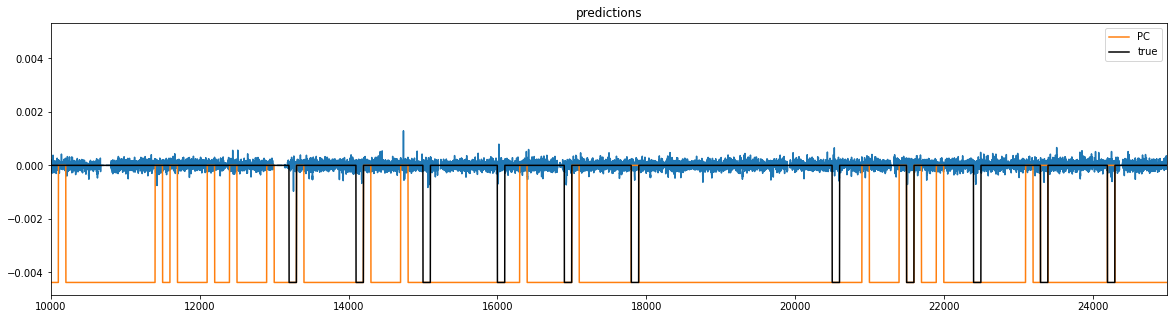

In [72]:
#makes no sense without a background!!!
from astropy.io import ascii
ent = 1
test_entry=os.listdir('test_data_raw200/xlabel/')
#print(test_entry)
Xexp=np.loadtxt('test_data_raw200/xlabel/'+test_entry[ent])
Yexp_tr = np.loadtxt('test_data_raw200/ylabel/'+test_entry[ent]) 

av_entry=ascii.read('autovetter_label.tab')
av_pl=np.array(av_entry['tce_plnt_num'])
ref_kepid=[('0000'+str(el)[:9])[-9:] for el in av_entry['kepid']]
ref_label=av_entry['av_training_set']

loc= np.where(np.array(ref_kepid)==test_entry[ent][0:9])
loc_f=[m for m in loc[0] if str(av_pl[m])==test_entry[ent][10]]
print(ref_label[loc_f[0]])


Yexp=np.argmax(convNN.predict(np.array(Xexp)),axis=1)
stXexp=np.concatenate(Xexp)
stYexp=[el*np.ones(100) for el in Yexp]
stYexp_tr=[el[0]*np.ones(100) for el in Yexp_tr]
stYexp=np.concatenate(stYexp)
stYexp_tr=np.concatenate(stYexp_tr)

plt.figure(figsize=(20,5))
plt.plot(stXexp)
plt.title("predictions")
plt.plot(stYexp*min(stXexp),label=ref_label[loc_f[0]])
plt.plot(stYexp_tr*min(stXexp),label="true",color='black')
plt.legend()
#print(Yexp)
plt.xlim(10000,25000)
#plt.ylim(-0.005,0.015)
plt.savefig("testing_PL_sample_3.png")
#Y=convNN.predict(np.array(Xexp))
